In [2]:
import pandas as pd

In [3]:
df1 = pd.read_csv("../data/finance/csv_files/yearly_spy_data.csv")
#df2 = pd.read_csv("../data/finance/csv_files/yearly_xar_data.csv")
df3 = pd.read_csv("../data/finance/csv_files/yearly_xhe_data.csv")

In [28]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['year'] = df1['Date'].dt.year

In [41]:
df3['Date'] = pd.to_datetime(df3['Date'])
df3['year'] = df3['Date'].dt.year

In [6]:
crime_df = pd.read_csv("../data/crime/estimated_crimes_1979_2022.csv")

In [7]:
crime_df

,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
0,1979,NaN,NaN,220099000,1208030,21460,76390.0,NaN,480700,629480,11041500,3327700,6601000,1112800,NaN
1,1979,AK,Alaska,406000,1994,54,292.0,NaN,445,1203,23193,5616,15076,2501,NaN
2,1979,AL,Alabama,3769000,15578,496,1037.0,NaN,4127,9918,144372,48517,83791,12064,NaN
3,1979,AR,Arkansas,2180000,7984,198,595.0,NaN,1626,5565,70949,21457,45267,4225,NaN
4,1979,AZ,Arizona,2450000,14528,219,1120.0,NaN,4305,8884,177977,48916,116976,12085,NaN
5,1979,CA,California,22696000,184087,2952,12239.0,NaN,75767,93129,1511021,496310,847148,167563,NaN
6,1979,CO,Colorado,2772000,14472,161,1472.0,NaN,4353,8486,180984,49741,117898,13345,NaN
7,1979,CT,Connecticut,3115000,12902,131,752.0,NaN,6021,5998,167131,48229,96997,21905,NaN
8,1979,DC,District of Columbia,656000,10553,180,489.0,NaN,6920,2964,45877,13452,28819,3606,NaN
9,1979,DE,Delaware,582000,3127,33,162.0,NaN,753,2179,34853,8890,23081,2882,NaN


In [13]:
total_crime_df = crime_df[pd.isna(crime_df['state_abbr'])]

In [45]:
df1_extracted = df1[['year','Close']]
total_crime_extracted = total_crime_df[['year','violent_crime','homicide']]

merged_df_spy = pd.merge(df1_extracted, total_crime_extracted, on='year', how='inner')

In [46]:
df3_extracted = df3[['year','Close']]
total_crime_extracted = total_crime_df[['year','violent_crime','homicide']]

merged_df_xhe = pd.merge(df3_extracted, total_crime_extracted, on='year', how='inner')

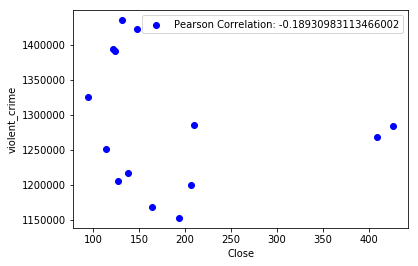

In [47]:
correlation = merged_df_spy['Close'].corr(merged_df_spy['violent_crime'], method='pearson')

plt.scatter(merged_df_spy['Close'], merged_df_spy['violent_crime'], c='b', label=f'Pearson Correlation: {correlation}')
plt.xlabel('Close')
plt.ylabel('violent_crime')
plt.legend()

# Display the plot
plt.show()


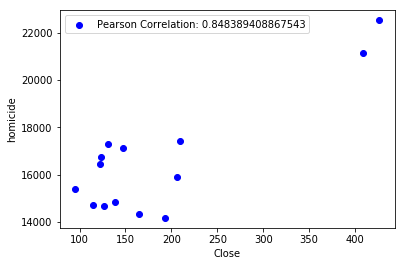

In [48]:
correlation1 = merged_df_spy['Close'].corr(merged_df_spy['homicide'], method='pearson')

plt.scatter(merged_df_spy['Close'], merged_df_spy['homicide'], c='b', label=f'Pearson Correlation: {correlation1}')
plt.xlabel('Close')
plt.ylabel('homicide')
plt.legend()

# Display the plot
plt.show()

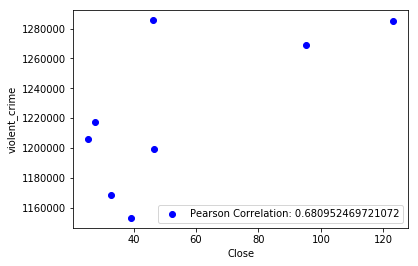

In [49]:
correlation2 = merged_df_xhe['Close'].corr(merged_df_xhe['violent_crime'], method='pearson')

plt.scatter(merged_df_xhe['Close'], merged_df_xhe['violent_crime'], c='b', label=f'Pearson Correlation: {correlation2}')
plt.xlabel('Close')
plt.ylabel('violent_crime')
plt.legend()

# Display the plot
plt.show()

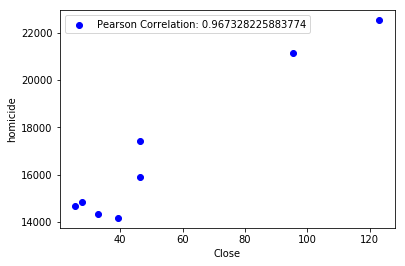

In [50]:
correlation3 = merged_df_xhe['Close'].corr(merged_df_xhe['homicide'], method='pearson')

plt.scatter(merged_df_xhe['Close'], merged_df_xhe['homicide'], c='b', label=f'Pearson Correlation: {correlation2}')
plt.xlabel('Close')
plt.ylabel('homicide')
plt.legend()

# Display the plot
plt.show()